CIFAR-10 데이터셋으로
KNN 알고리즘 활용하여 분류 --> 분류 결과가 좋지 않음
*NN은 근접한 거리로만 분류를 하는데, 이미지 인식에는 적합하지 않음

따라서 Data Driven으로 분류하는 방법이 필요(기존에는 Feature vector, Edge를 사용)

data set을
1. Train
2. Validation
3. Test
로 나눠서 사용해야함

NN대신 Linear Classifier가 더 좋음
 W*x + b 를 통해 Score를 뽑아내고, Score가 높으면 그 클래스에 속하는 것.


계산된 W가 좋은지 나쁜지 평가가 필요함.

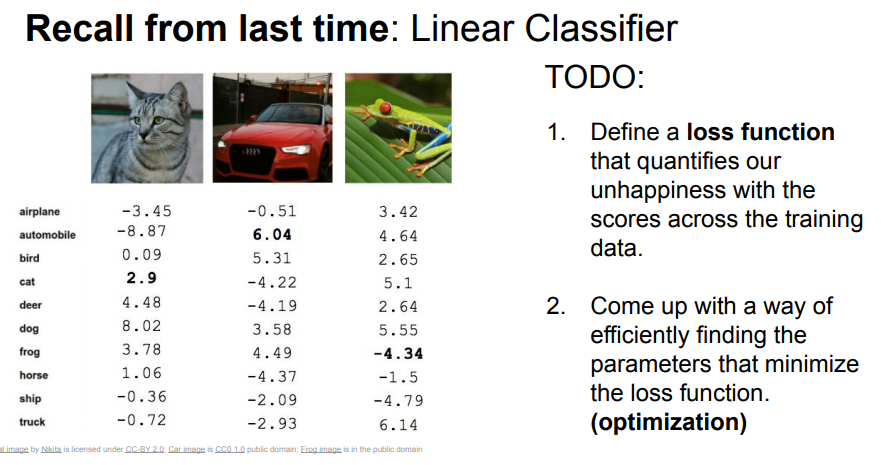

score를 보았을 때, 
고양이-고양이 는 2.9점
강아지-강아지는 8.02  최고
개구리-개구리는 -4.34  최악

이에 따라 W가 좋다/나쁘다 판단가능 하지만, 정량화를 해줘야 함.
이것이 
Loss Function  이다. W가 얼마만큼 안좋다, error  rate가 높다. 라고 말할 수 있음.

W가 안좋으면, Optimization을 통해 좋은 쪽으로 찾아간다.


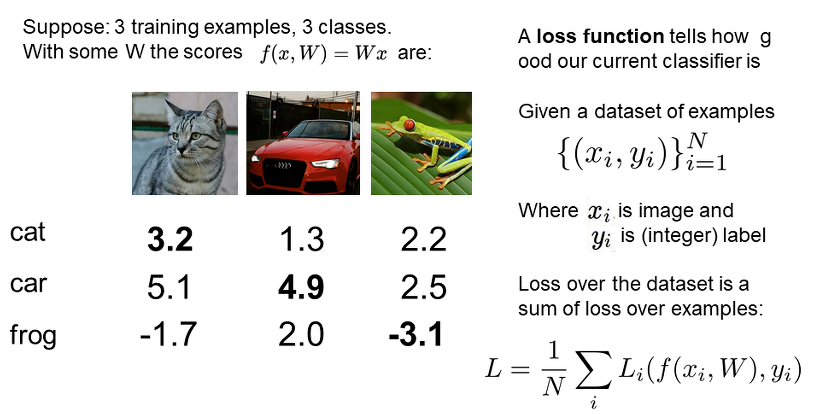

x : 이미지
y : Label

Loss function : 각 class별 loss를 더하고, 평균을 구함

###  SVM LOSS  ###

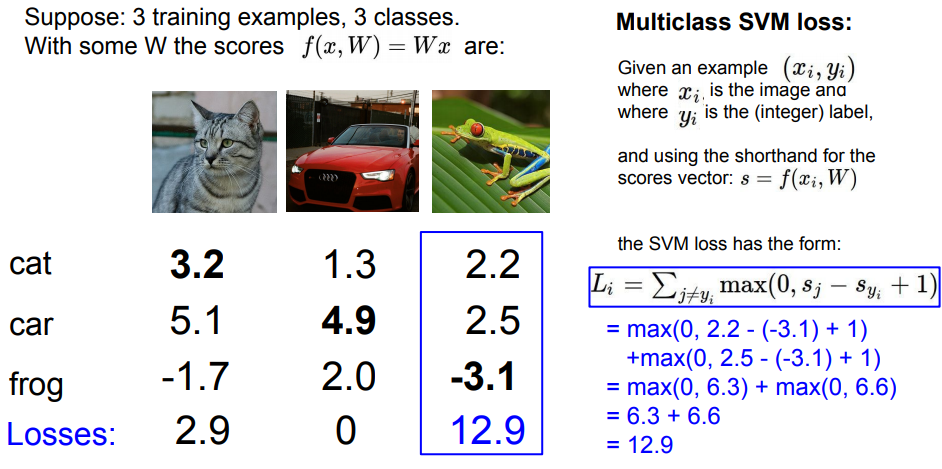

Syi=정답일 때 score
Sj =오답일 때 score

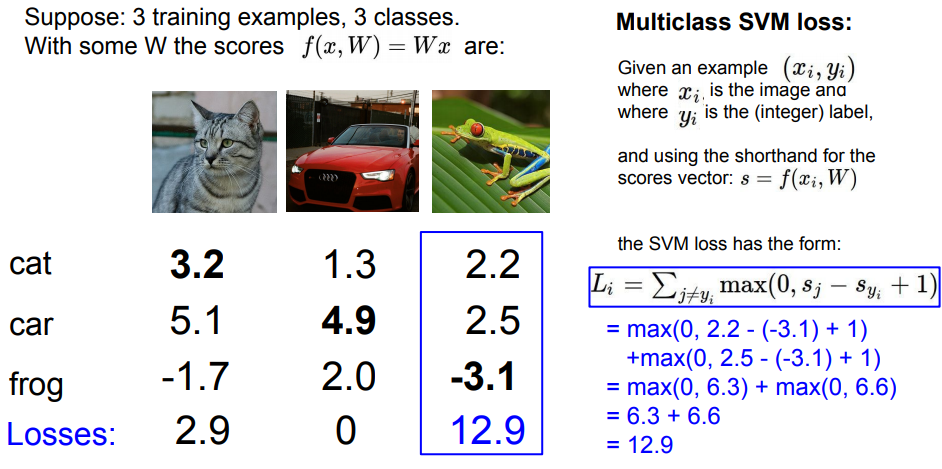


## Q1 : Loss를 평균값으로 하면 어떻게돼?
- 별 차이 없어. 그냥 Sclaing만 한 값. 왜냐면 어차피 제일 큰게 중요하니까.

## Q2 : 자동차-자동차 스코어를 0.5 줄이면 어때?
 - 똑같아. 결국 차의 스코어가 가장 높으니까. --> 이말은, SVM은 데이터에 민감하지 않다는 뜻이다. 스코어가 몇점인지 관심 없고, 정답 클래스가 다른 클래스보다 높냐? 가 중요함.
 
## Q3 : Min/Max Loss는 ?
 - 0부터 무제한
 
## Q4 : W가 너무 작아서 모든 스코어가 0에 가까워. 그럼 어떻게 돼?
 - 계산해보면, 2 + 2 + 2 / 3 =2
             9 + 9 + 9 + ... 9 / 10 =9 
             즉, 클래스 개수 -1값이 나옴.
             이 값은 sanity check라고 해서 디버그용으로 쓰임. 0으로 해주면 loss가 잘 나오나 검사하는용도.
             
##  Q5 : 정답 클래스도 포함해서 구하면 어떻게 되나?
 - Loss + 1 이 된다.   우리는 Loss가 0이되길 바라는데, 1이 가장 좋아서 그냥 빼줌.
 
## Q6 : Loss를 제곱하면? 
 - 답은 달라진다. 대경우에 따라 이게 더 좋을수도. 매~우 안좋다 or 매~우 좋다를 따질때 유용하지만 잘 안씀.
 


## Regularization

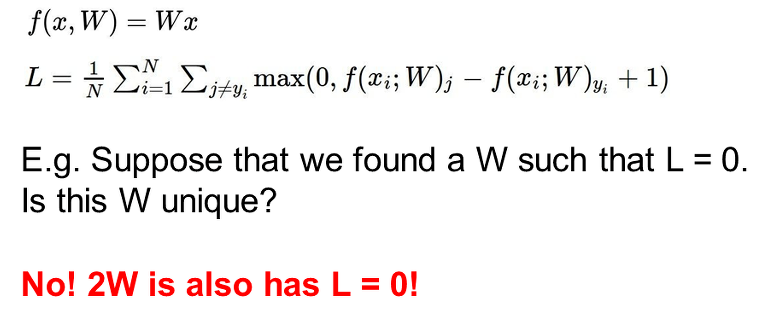

## 그렇다면, 우리가 구한 W 는 좋은거야? 2W? 3W??
 - W에 무슨 값을 곱하던, score는 동일하게 나온다. 즉 좋은건지 나쁜건지, 가장 좋은건지 알 수가 없어..
 
 - 우리에게 중요한건 Test set이 더 중요해. 왜냐면 test set으로 예측했을 때, 정확해야 하니까. 하지만 W는 Train set에 맞춰지도록 되어있어서, Overfitting이 일어날 수 있어.
 

### 그래서 Regularization이 필요하다! 

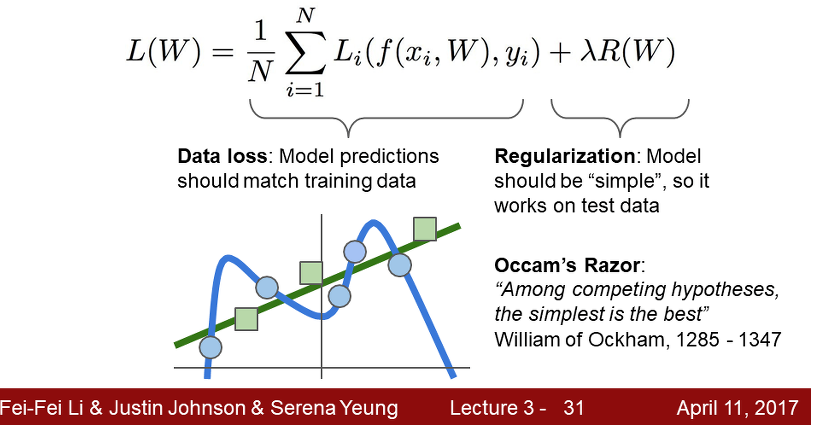

파란선 : train set에만 맞춘 결과(Overfitting)
파란 동그라미 : train set
초록 네모 : Test set
초록선 : Regularization을 통해 만든 그래프.

 - Regularization : 파란색에 너무 맞추면 틀리니까, 이정도 패널티는 감안해야해! 라고 하며 모델을 simple하게 만들어주는 역할을 함.

### Softmax Classifier

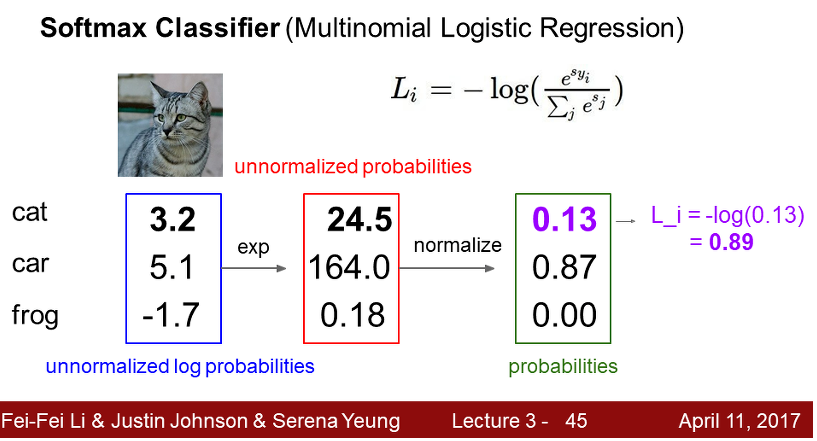

1. 모든 스코어에 exp함수를 취함.
2. 원하는 클래스의 점수를 확률로 변환.
3. -log를 취해 loss를 구한다.

* -log 를 취하는 이유 ?    얼마나 안좋은지 판별하는게 loss.-log 는 확률이 1에 가까워질수록 0에 가까워 지기 때문에!

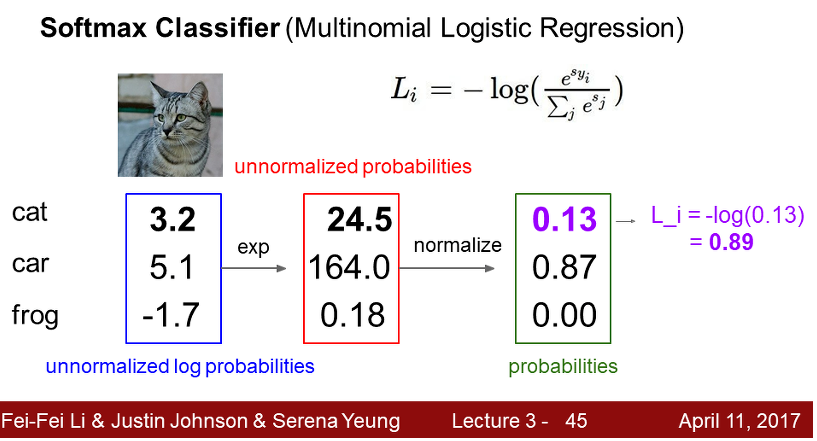

## Q1 : min/max는 ? 
 - 최소는 0, 최대는 무한대.

## Q2 : W가 너무 작을 때, Loss는?
 -log(1/N of class) = sanity check 용으로 사용함.
 
 ## Q3 : SVM vs Softmax . score를 조금 바꿨을 때, 어떻게 변화하나?
  - Softmax는 SVM과 다르게, 확률로 계산되기 때문에 바로 영향을 미침.
  
  
## Q4 : 그래서, Full loss를 통해 W가 안좋은걸 알게 됐다. 어떻게 best W 를 찾지?
 - Optimizaion.
  

### Optimization

1. random search : 말 그대로, 랜덤으로... 너무 비효율적이고 별로. 안씀

2. Gradient descent : 경사를 따라 내려감     미분으로 기울기를 구하고 따라서 내려감.

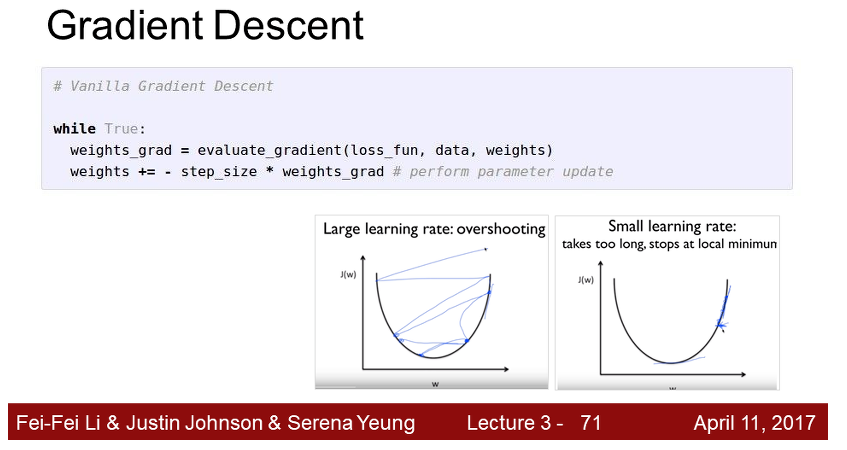


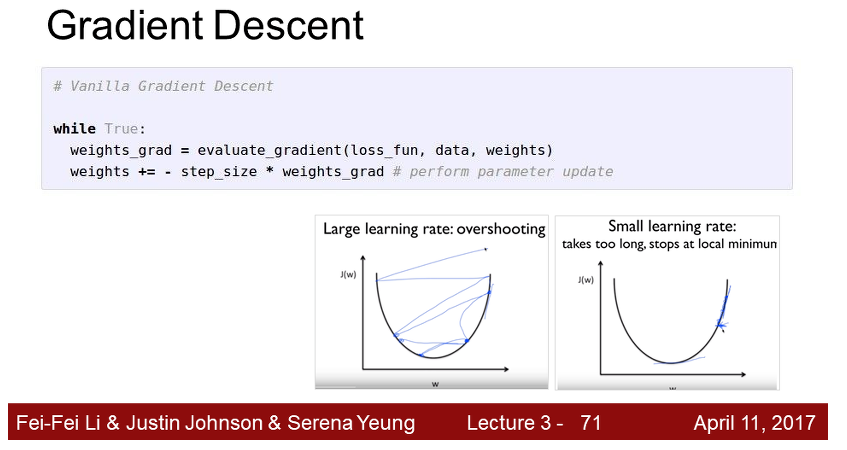

 - Gradient descent 계산법.
 stepsize = learning rate : 한번에 얼마나 내려갈꺼냐
 
 - 실제로는 N을 한번에 계산했는데, N이 수천만개이면 너무 느리고 비효율적.
 - 그래서 SGD(stochastic gradient decent)를 사용함. minibatch를 두어서 데이터 개수를 잘라서 사용. --> 256개 업데이트 한 다음 또 256개, 그다음 256개 ...